For details, see: https://www.tidy-finance.org/python/accessing-and-managing-financial-data.html

# Accessing and Managing Financial Data

In [3]:
#!pip install -r "requirements.txt"
# https://github.com/tidy-finance/website/blob/main/requirements.txt

In [4]:
import pandas as pd
import numpy as np

In [5]:
start_date = "1960-01-01"
end_date = "2023-12-31"

In [6]:
# We start by downloading some famous Fama-French factors (e.g., Fama and French 1993) and portfolio returns commonly used in empirical asset pricing. Fortunately, the pandas-datareader package provides a simple interface to read data from Kenneth French’s Data Library.
import pandas_datareader as pdr

In [7]:
#ALL datasets
#pdr.famafrench.get_available_datasets()

### Factor 3 and 5

In [9]:
factors_ff3_monthly_raw = pdr.DataReader(
  name="F-F_Research_Data_Factors",
  data_source="famafrench", 
  start=start_date, 
  end=end_date)[0]

factors_ff3_monthly = (factors_ff3_monthly_raw
  .divide(100)
  .reset_index(names="date")
  .assign(date=lambda x: pd.to_datetime(x["date"].astype(str)))
  .rename(str.lower, axis="columns")
  .rename(columns={"mkt-rf": "mkt_excess"})
)

C:\Users\Hugo\AppData\Local\Temp\ipykernel_25032\3530363573.py:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors_ff3_monthly_raw = pdr.DataReader(
C:\Users\Hugo\AppData\Local\Temp\ipykernel_25032\3530363573.py:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors_ff3_monthly_raw = pdr.DataReader(


In [10]:
factors_ff5_monthly_raw = pdr.DataReader(
  name="F-F_Research_Data_5_Factors_2x3",
  data_source="famafrench", 
  start=start_date, 
  end=end_date)[0]

factors_ff5_monthly = (factors_ff5_monthly_raw
  .divide(100)
  .reset_index(names="date")
  .assign(date=lambda x: pd.to_datetime(x["date"].astype(str)))
  .rename(str.lower, axis="columns")
  .rename(columns={"mkt-rf": "mkt_excess"})
)

C:\Users\Hugo\AppData\Local\Temp\ipykernel_25032\1470603030.py:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors_ff5_monthly_raw = pdr.DataReader(
C:\Users\Hugo\AppData\Local\Temp\ipykernel_25032\1470603030.py:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors_ff5_monthly_raw = pdr.DataReader(


In [11]:
factors_ff3_daily_raw = pdr.DataReader(
  name="F-F_Research_Data_Factors_daily",
  data_source="famafrench", 
  start=start_date, 
  end=end_date)[0]

factors_ff3_daily = (factors_ff3_daily_raw
  .divide(100)
  .reset_index(names="date")
  .rename(str.lower, axis="columns")
  .rename(columns={"mkt-rf": "mkt_excess"})
)

C:\Users\Hugo\AppData\Local\Temp\ipykernel_25032\4051783287.py:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors_ff3_daily_raw = pdr.DataReader(


In [12]:
industries_ff_monthly_raw = pdr.DataReader(
  name="10_Industry_Portfolios",
  data_source="famafrench", 
  start=start_date, 
  end=end_date)[0]

industries_ff_monthly = (industries_ff_monthly_raw
  .divide(100)
  .reset_index(names="date")
  .assign(date=lambda x: pd.to_datetime(x["date"].astype(str)))
  .rename(str.lower, axis="columns")
)

C:\Users\Hugo\AppData\Local\Temp\ipykernel_25032\211383734.py:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  industries_ff_monthly_raw = pdr.DataReader(
C:\Users\Hugo\AppData\Local\Temp\ipykernel_25032\211383734.py:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  industries_ff_monthly_raw = pdr.DataReader(
C:\Users\Hugo\AppData\Local\Temp\ipykernel_25032\211383734.py:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  industries_ff_monthly_raw = pdr.DataReader(
C:\Users\Hugo\AppData\Local\Temp\ipykernel_25032\211383734.py:1: Futur

### q-Factors

In [14]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

factors_q_monthly_link = (
  "https://global-q.org/uploads/1/2/2/6/122679606/"
  "q5_factors_monthly_2023.csv"
)

factors_q_monthly = (pd.read_csv(factors_q_monthly_link)
  .assign(
    date=lambda x: (
      pd.to_datetime(x["year"].astype(str) + "-" +
        x["month"].astype(str) + "-01"))
  )
  .drop(columns=["R_F", "R_MKT", "year"])
  .rename(columns=lambda x: x.replace("R_", "").lower())
  .query(f"date >= '{start_date}' and date <= '{end_date}'")
  .assign(
    **{col: lambda x: x[col]/100 for col in ["me", "ia", "roe", "eg"]}
  )
)

ssl._create_default_https_context = ssl.create_default_context

### Macroeconomic Predictors

In [16]:
sheet_id = "1bM7vCWd3WOt95Sf9qjLPZjoiafgF_8EG"
sheet_name = "macro_predictors.xlsx"
macro_predictors_link = (
  f"https://docs.google.com/spreadsheets/d/{sheet_id}" 
  f"/gviz/tq?tqx=out:csv&sheet={sheet_name}"
)

In [17]:
ssl._create_default_https_context = ssl._create_unverified_context

macro_predictors = (
  pd.read_csv(macro_predictors_link, thousands=",")
  .assign(
    date=lambda x: pd.to_datetime(x["yyyymm"], format="%Y%m"),
    dp=lambda x: np.log(x["D12"])-np.log(x["Index"]),
    dy=lambda x: np.log(x["D12"])-np.log(x["Index"].shift(1)),
    ep=lambda x: np.log(x["E12"])-np.log(x["Index"]),
    de=lambda x: np.log(x["D12"])-np.log(x["E12"]),
    tms=lambda x: x["lty"]-x["tbl"],
    dfy=lambda x: x["BAA"]-x["AAA"]
  )
  .rename(columns={"b/m": "bm"})
  .get(["date", "dp", "dy", "ep", "de", "svar", "bm", 
        "ntis", "tbl", "lty", "ltr", "tms", "dfy", "infl"])
  .query("date >= @start_date and date <= @end_date")
  .dropna()
)

ssl._create_default_https_context = ssl.create_default_context

In [18]:
cpi_monthly = (pdr.DataReader(
    name="CPIAUCNS", 
    data_source="fred", 
    start=start_date, 
    end=end_date
  )
  .reset_index(names="date")
  .rename(columns={"CPIAUCNS": "cpi"})
  .assign(cpi=lambda x: x["cpi"]/x["cpi"].iloc[-1])
)

## Setting Up a Database (SQL)

There are many ways to set up and organize a database, depending on the use case. For our purpose, the most efficient way is to use an SQLite-database, which is the C-language library that implements a small, fast, self-contained, high-reliability, full-featured SQL database engine. Note that SQL (Structured Query Language) is a standard language for accessing and manipulating databases.

In [21]:
import sqlite3

In [22]:
import os

if not os.path.exists("data"):
  os.makedirs("data")
    
tidy_finance = sqlite3.connect(database="data/tidy_finance_python.sqlite")

In [23]:
(factors_ff3_monthly
  .to_sql(name="factors_ff3_monthly", 
          con=tidy_finance, 
          if_exists="replace",
          index=False)
)

768

In [24]:
pd.read_sql_query(
  sql="SELECT date, rf FROM factors_ff3_monthly",
  con=tidy_finance,
  parse_dates={"date"}
)

,date,rf
0,1960-01-01,0.0033
1,1960-02-01,0.0029
2,1960-03-01,0.0035
3,1960-04-01,0.0019
4,1960-05-01,0.0027
...,...,...
763,2023-08-01,0.0045
764,2023-09-01,0.0043
765,2023-10-01,0.0047
766,2023-11-01,0.0044


In [25]:
data_dict = {
  "factors_ff5_monthly": factors_ff5_monthly,
  "factors_ff3_daily": factors_ff3_daily,
  "industries_ff_monthly": industries_ff_monthly, 
  "factors_q_monthly": factors_q_monthly,
  "macro_predictors": macro_predictors,
  "cpi_monthly": cpi_monthly
}

for key, value in data_dict.items():
    value.to_sql(name=key,
                 con=tidy_finance, 
                 if_exists="replace",
                 index=False)

In [26]:
import pandas as pd
import sqlite3

tidy_finance = sqlite3.connect(database="data/tidy_finance_python.sqlite")

factors_q_monthly = pd.read_sql_query(
  sql="SELECT * FROM factors_q_monthly",
  con=tidy_finance,
  parse_dates={"date"}
)

In [27]:
tidy_finance.execute("VACUUM")

# WRDS, CRSP, and Compustat ** NEED TO BE DONE **

In [29]:
import pandas as pd
import numpy as np
import sqlite3

from plotnine import *
from mizani.formatters import comma_format, percent_format
from datetime import datetime

In [30]:
start_date = "1960-01-01"
end_date = "2023-12-31"

## Accessing WRDS

WRDS is the most widely used source for asset and firm-specific financial data used in academic settings. WRDS is a data platform that provides data validation, flexible delivery options, and access to many different data sources. We use the sqlalchemy package to establish a connection to the WRDS database because it already contains a suitable driver.1

In [33]:
from sqlalchemy import create_engine

In [34]:
start_date = "01/01/1960"
end_date = "12/31/2023"

In [35]:
import os
from dotenv import load_dotenv
load_dotenv( encoding="utf-16")

connection_string = (
  "postgresql+psycopg2://"
 f"{os.getenv('WRDS_USER')}:{os.getenv('WRDS_PASSWORD')}"
  "@wrds-pgdata.wharton.upenn.edu:9737/wrds"
)

wrds = create_engine(connection_string, pool_pre_ping=True)

## Downloading and Preparing CRSP

We first need to connect to Wharton Research Data Services (WRDS). See this to know how. (Not free, but accesible to researcher & Students). 

https://www.tidy-finance.org/python/setting-up-your-environment.html 

In [38]:
crsp_monthly_query = (
  "SELECT msf.permno, date_trunc('month', msf.mthcaldt)::date AS date, "
         "msf.mthret AS ret, msf.shrout, msf.mthprc AS altprc, "
         "ssih.primaryexch, ssih.siccd "
    "FROM crsp.msf_v2 AS msf "
    "INNER JOIN crsp.stksecurityinfohist AS ssih "
    "ON msf.permno = ssih.permno AND "
       "ssih.secinfostartdt <= msf.mthcaldt AND "
       "msf.mthcaldt <= ssih.secinfoenddt "
   f"WHERE msf.mthcaldt BETWEEN '{start_date}' AND '{end_date}' "
          "AND ssih.sharetype = 'NS' "
          "AND ssih.securitytype = 'EQTY' "  
          "AND ssih.securitysubtype = 'COM' " 
          "AND ssih.usincflg = 'Y' " 
          "AND ssih.issuertype in ('ACOR', 'CORP') " 
          "AND ssih.primaryexch in ('N', 'A', 'Q') "
          "AND ssih.conditionaltype in ('RW', 'NW') "
          "AND ssih.tradingstatusflg = 'A'"
)

crsp_monthly = (pd.read_sql_query(
    sql=crsp_monthly_query,
    con=wrds,
    dtype={"permno": int, "siccd": int},
    parse_dates={"date"})
  .assign(shrout=lambda x: x["shrout"]*1000)
)

In [39]:
crsp_monthly = (crsp_monthly
  .assign(mktcap=lambda x: x["shrout"]*x["altprc"]/1000000)
  .assign(mktcap=lambda x: x["mktcap"].replace(0, np.nan))
)


In [40]:
mktcap_lag = (crsp_monthly
  .assign(
    date=lambda x: x["date"]+pd.DateOffset(months=1),
    mktcap_lag=lambda x: x["mktcap"]
  )
  .get(["permno", "date", "mktcap_lag"])
)

crsp_monthly = (crsp_monthly
  .merge(mktcap_lag, how="left", on=["permno", "date"])
)

In [41]:
def assign_exchange(primaryexch):
    if primaryexch == "N":
        return "NYSE"
    elif primaryexch == "A":
        return "AMEX"
    elif primaryexch == "Q":
        return "NASDAQ"
    else:
        return "Other"

crsp_monthly["exchange"] = (crsp_monthly["primaryexch"]
  .apply(assign_exchange)
)

In [42]:
def assign_industry(siccd):
    if 1 <= siccd <= 999:
        return "Agriculture"
    elif 1000 <= siccd <= 1499:
        return "Mining"
    elif 1500 <= siccd <= 1799:
        return "Construction"
    elif 2000 <= siccd <= 3999:
        return "Manufacturing"
    elif 4000 <= siccd <= 4899:
        return "Transportation"
    elif 4900 <= siccd <= 4999:
        return "Utilities"
    elif 5000 <= siccd <= 5199:
        return "Wholesale"
    elif 5200 <= siccd <= 5999:
        return "Retail"
    elif 6000 <= siccd <= 6799:
        return "Finance"
    elif 7000 <= siccd <= 8999:
        return "Services"
    elif 9000 <= siccd <= 9999:
        return "Public"
    else:
        return "Missing"

crsp_monthly["industry"] = (crsp_monthly["siccd"]
  .apply(assign_industry)
)

Next, we compute excess returns by subtracting the monthly risk-free rate provided by our Fama-French data. As we base all our analyses on the excess returns, we can drop the risk-free rate from our data frame. Note that we ensure excess returns are bounded by -1 from below as a return less than -100% makes no sense conceptually. Before we can adjust the returns, we have to connect to our database and load the data frame factors_ff3_monthly.

In [44]:
tidy_finance = sqlite3.connect(database="data/tidy_finance_python.sqlite")

factors_ff3_monthly = pd.read_sql_query(
  sql="SELECT date, rf FROM factors_ff3_monthly",
  con=tidy_finance,
  parse_dates={"date"}
)
  
crsp_monthly = (crsp_monthly
  .merge(factors_ff3_monthly, how="left", on="date")
  .assign(ret_excess=lambda x: x["ret"]-x["rf"])
  .assign(ret_excess=lambda x: x["ret_excess"].clip(lower=-1))
  .drop(columns=["rf"])
)

In [45]:
crsp_monthly = (crsp_monthly
  .dropna(subset=["ret_excess", "mktcap", "mktcap_lag"])
)

In [46]:
(crsp_monthly
  .to_sql(name="crsp_monthly", 
          con=tidy_finance, 
          if_exists="replace",
          index=False)
)

3378303

## First Glimpse of the CRSP Sample

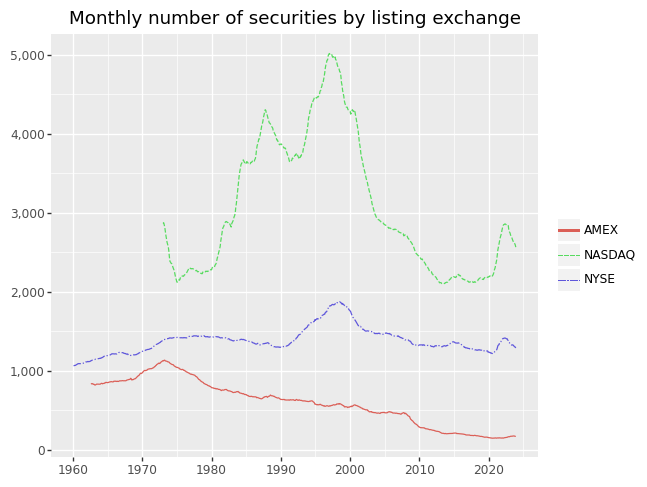

In [48]:
securities_per_exchange = (crsp_monthly
  .groupby(["exchange", "date"])
  .size()
  .reset_index(name="n")
)

securities_per_exchange_figure = (
  ggplot(securities_per_exchange, 
         aes(x="date", y="n", color="exchange", linetype="exchange")) +
  geom_line() + 
  labs(x="", y="", color="", linetype="",
       title="Monthly number of securities by listing exchange") +
  scale_x_datetime(date_breaks="10 years", date_labels="%Y") +
  scale_y_continuous(labels=comma_format())
)
securities_per_exchange_figure.draw()

C:\Users\Hugo\AppData\Local\Temp\ipykernel_25032\3015897378.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.


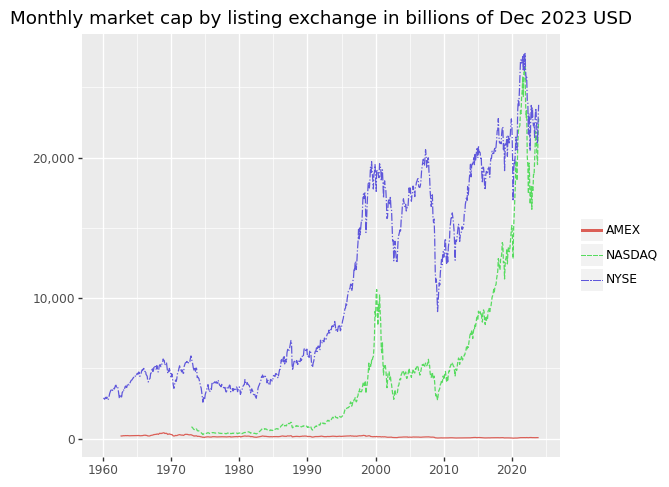

In [49]:
cpi_monthly = pd.read_sql_query(
  sql="SELECT * FROM cpi_monthly",
  con=tidy_finance,
  parse_dates={"date"}
)

market_cap_per_exchange = (crsp_monthly
  .merge(cpi_monthly, how="left", on="date")
  .groupby(["date", "exchange"])
  .apply(
    lambda group: pd.Series({
      "mktcap": group["mktcap"].sum()/group["cpi"].mean()
    })
  )
  .reset_index()
)

market_cap_per_exchange_figure = (
  ggplot(market_cap_per_exchange, 
         aes(x="date", y="mktcap/1000", 
             color="exchange", linetype="exchange")) +
  geom_line() +
  labs(x="", y="", color="", linetype="",
       title=("Monthly market cap by listing exchange "
              "in billions of Dec 2023 USD")) + 
  scale_x_datetime(date_breaks="10 years", date_labels="%Y") +
  scale_y_continuous(labels=comma_format())
)
market_cap_per_exchange_figure.draw()

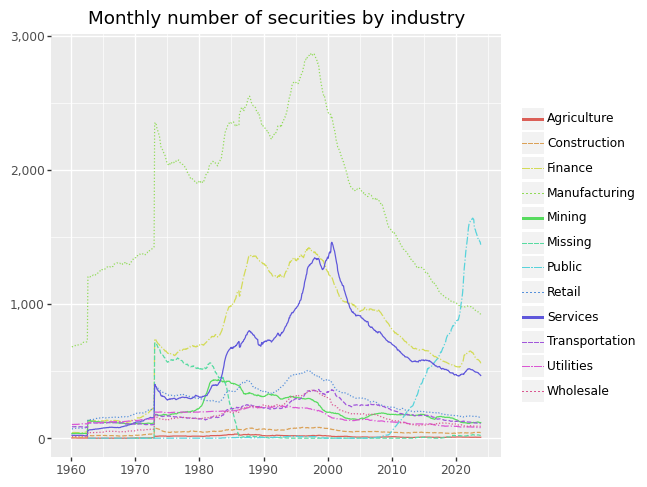

In [50]:
securities_per_industry = (crsp_monthly
  .groupby(["industry", "date"])
  .size()
  .reset_index(name="n")
)

linetypes = ["-", "--", "-.", ":"]
n_industries = securities_per_industry["industry"].nunique()

securities_per_industry_figure = (
  ggplot(securities_per_industry, 
         aes(x="date", y="n", color="industry", linetype="industry")) + 
  geom_line() + 
  labs(x="", y="", color="", linetype="",
       title="Monthly number of securities by industry") +
  scale_x_datetime(date_breaks="10 years", date_labels="%Y") + 
  scale_y_continuous(labels=comma_format()) +
  scale_linetype_manual(
    values=[linetypes[l % len(linetypes)] for l in range(n_industries)]
  ) 
)
securities_per_industry_figure.draw()

C:\Users\Hugo\AppData\Local\Temp\ipykernel_25032\2244878226.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.


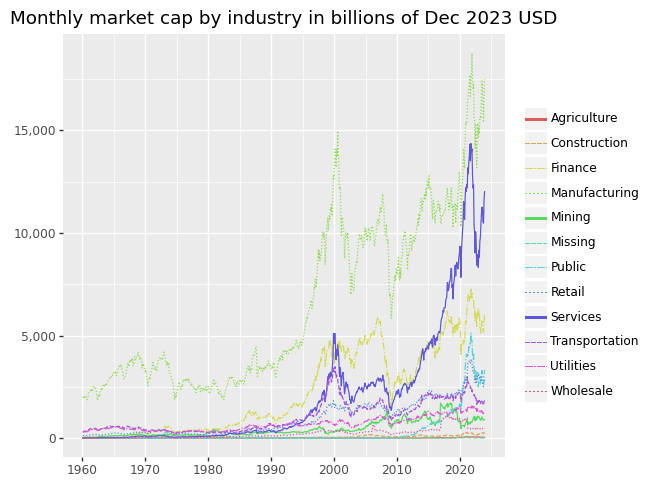

In [51]:
market_cap_per_industry = (crsp_monthly
  .merge(cpi_monthly, how="left", on="date")
  .groupby(["date", "industry"])
  .apply(
    lambda group: pd.Series({
      "mktcap": (group["mktcap"].sum()/group["cpi"].mean())
    })
  )
  .reset_index()
)

market_cap_per_industry_figure = (
  ggplot(market_cap_per_industry, 
         aes(x="date", y="mktcap/1000", 
             color="industry", linetype="industry")) +
  geom_line() + 
  labs(x="", y="", color="", linetype="",
       title="Monthly market cap by industry in billions of Dec 2023 USD") + 
  scale_x_datetime(date_breaks="10 years", date_labels="%Y") + 
  scale_y_continuous(labels=comma_format()) +
  scale_linetype_manual(
    values=[linetypes[l % len(linetypes)] for l in range(n_industries)]
  ) 
)
market_cap_per_industry_figure.draw()

## Daily CRSP Data

In [53]:
factors_ff3_daily = pd.read_sql(
  sql="SELECT * FROM factors_ff3_daily", 
  con=tidy_finance,
  parse_dates={"date"}
)

permnos = pd.read_sql(
  sql="SELECT DISTINCT permno FROM crsp.stksecurityinfohist", 
  con=wrds,
  dtype={"permno": int}
)

permnos = list(permnos["permno"].astype(str))
  
batch_size = 500
batches = np.ceil(len(permnos)/batch_size).astype(int)
  
for j in range(1, batches+1):  
    
  permno_batch = permnos[
    ((j-1)*batch_size):(min(j*batch_size, len(permnos)))
  ]
  
  permno_batch_formatted = (
    ", ".join(f"'{permno}'" for permno in permno_batch)
  )
  permno_string = f"({permno_batch_formatted})"
  
  crsp_daily_sub_query = (
    "SELECT dsf.permno, dlycaldt AS date, dlyret AS ret "
      "FROM crsp.dsf_v2 AS dsf "
      "INNER JOIN crsp.stksecurityinfohist AS ssih "
      "ON dsf.permno = ssih.permno AND "
         "ssih.secinfostartdt <= dsf.dlycaldt AND "
         "dsf.dlycaldt <= ssih.secinfoenddt "
      f"WHERE dsf.permno IN {permno_string} "
           f"AND dlycaldt BETWEEN '{start_date}' AND '{end_date}' "
            "AND ssih.sharetype = 'NS' "
            "AND ssih.securitytype = 'EQTY' "  
            "AND ssih.securitysubtype = 'COM' " 
            "AND ssih.usincflg = 'Y' " 
            "AND ssih.issuertype in ('ACOR', 'CORP') " 
            "AND ssih.primaryexch in ('N', 'A', 'Q') "
            "AND ssih.conditionaltype in ('RW', 'NW') "
            "AND ssih.tradingstatusflg = 'A'"
  )
    
  crsp_daily_sub = (pd.read_sql_query(
      sql=crsp_daily_sub_query,
      con=wrds,
      dtype={"permno": int},
      parse_dates={"date"}
    )
    .dropna()
   )

  if not crsp_daily_sub.empty:
    
      crsp_daily_sub = (crsp_daily_sub
        .merge(factors_ff3_daily[["date", "rf"]], 
               on="date", how="left")
        .assign(
          ret_excess = lambda x: 
            ((x["ret"] - x["rf"]).clip(lower=-1))
        )
        .get(["permno", "date", "ret_excess"])
      )
        
      if j == 1:
        if_exists_string = "replace"
      else:
        if_exists_string = "append"

      crsp_daily_sub.to_sql(
        name="crsp_daily", 
        con=tidy_finance, 
        if_exists=if_exists_string, 
        index=False
      )
            
  print(f"Batch {j} out of {batches} done ({(j/batches)*100:.2f}%)\n")

Batch 1 out of 76 done (1.32%)

Batch 2 out of 76 done (2.63%)

Batch 3 out of 76 done (3.95%)

Batch 4 out of 76 done (5.26%)

Batch 5 out of 76 done (6.58%)

Batch 6 out of 76 done (7.89%)

Batch 7 out of 76 done (9.21%)

Batch 8 out of 76 done (10.53%)

Batch 9 out of 76 done (11.84%)

Batch 10 out of 76 done (13.16%)

Batch 11 out of 76 done (14.47%)

Batch 12 out of 76 done (15.79%)

Batch 13 out of 76 done (17.11%)

Batch 14 out of 76 done (18.42%)

Batch 15 out of 76 done (19.74%)

Batch 16 out of 76 done (21.05%)

Batch 17 out of 76 done (22.37%)

Batch 18 out of 76 done (23.68%)

Batch 19 out of 76 done (25.00%)

Batch 20 out of 76 done (26.32%)

Batch 21 out of 76 done (27.63%)

Batch 22 out of 76 done (28.95%)

Batch 23 out of 76 done (30.26%)

Batch 24 out of 76 done (31.58%)

Batch 25 out of 76 done (32.89%)

Batch 26 out of 76 done (34.21%)

Batch 27 out of 76 done (35.53%)

Batch 28 out of 76 done (36.84%)

Batch 29 out of 76 done (38.16%)

Batch 30 out of 76 done (39.47

## Preparing Compustat Data

In [55]:
compustat_query = (
  "SELECT gvkey, datadate, seq, ceq, at, lt, txditc, txdb, itcb,  pstkrv, "
         "pstkl, pstk, capx, oancf, sale, cogs, xint, xsga "
    "FROM comp.funda "
    "WHERE indfmt = 'INDL' "
          "AND datafmt = 'STD' "
          "AND consol = 'C' "
          "AND curcd = 'USD' "
         f"AND datadate BETWEEN '{start_date}' AND '{end_date}'"
)

compustat = pd.read_sql_query(
  sql=compustat_query,
  con=wrds,
  dtype={"gvkey": str},
  parse_dates={"datadate"}
)

In [56]:
compustat = (compustat
  .assign(
    be=lambda x: 
      (x["seq"].combine_first(x["ceq"]+x["pstk"])
       .combine_first(x["at"]-x["lt"])+
       x["txditc"].combine_first(x["txdb"]+x["itcb"]).fillna(0)-
       x["pstkrv"].combine_first(x["pstkl"])
       .combine_first(x["pstk"]).fillna(0))
  )
  .assign(
    be=lambda x: x["be"].apply(lambda y: np.nan if y <= 0 else y)
  )
  .assign(
    op=lambda x: 
      ((x["sale"]-x["cogs"].fillna(0)- 
        x["xsga"].fillna(0)-x["xint"].fillna(0))/x["be"])
  )
)

In [57]:
compustat = (compustat
  .assign(year=lambda x: pd.DatetimeIndex(x["datadate"]).year)
  .sort_values("datadate")
  .groupby(["gvkey", "year"])
  .tail(1)
  .reset_index()
)

In [58]:
compustat_lag = (compustat
  .get(["gvkey", "year", "at"])
  .assign(year=lambda x: x["year"]+1)
  .rename(columns={"at": "at_lag"})
)

compustat = (compustat
  .merge(compustat_lag, how="left", on=["gvkey", "year"])
  .assign(inv=lambda x: x["at"]/x["at_lag"]-1)
  .assign(inv=lambda x: np.where(x["at_lag"] <= 0, np.nan, x["inv"]))
)

In [59]:
(compustat
  .to_sql(name="compustat", 
          con=tidy_finance, 
          if_exists="replace",
          index=False)
)

495613

## Merging CRSP with Compustat

In [61]:
ccm_linking_table_query = (
  "SELECT lpermno AS permno, gvkey, linkdt, "
         "COALESCE(linkenddt, CURRENT_DATE) AS linkenddt "
    "FROM crsp.ccmxpf_linktable "
    "WHERE linktype IN ('LU', 'LC') "
          "AND linkprim IN ('P', 'C')"
)

ccm_linking_table = pd.read_sql_query(
  sql=ccm_linking_table_query,
  con=wrds,
  dtype={"permno": int, "gvkey": str},
  parse_dates={"linkdt", "linkenddt"}
)

In [62]:
ccm_links = (crsp_monthly
  .merge(ccm_linking_table, how="inner", on="permno")
  .query("~gvkey.isnull() & (date >= linkdt) & (date <= linkenddt)")
  .get(["permno", "gvkey", "date"])
)

crsp_monthly = (crsp_monthly
  .merge(ccm_links, how="left", on=["permno", "date"])
)

In [63]:
(crsp_monthly
  .to_sql(name="crsp_monthly", 
          con=tidy_finance, 
          if_exists="replace",
          index=False)
)

3378303

C:\Users\Hugo\AppData\Local\Temp\ipykernel_25032\3439271066.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.


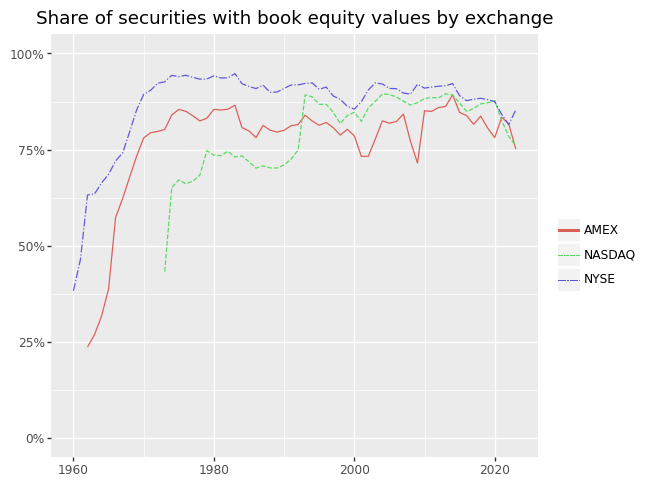

In [64]:
share_with_be = (crsp_monthly
  .assign(year=lambda x: pd.DatetimeIndex(x["date"]).year)
  .sort_values("date")
  .groupby(["permno", "year"])
  .tail(1)
  .reset_index()
  .merge(compustat, how="left", on=["gvkey", "year"])
  .groupby(["exchange", "year"])
  .apply(
    lambda x: pd.Series({
    "share": x["permno"][~x["be"].isnull()].nunique()/x["permno"].nunique()
    })
  )
  .reset_index()
)

share_with_be_figure = (
  ggplot(share_with_be, 
         aes(x="year", y="share", color="exchange", linetype="exchange")) + 
  geom_line() + 
  labs(x="", y="", color="", linetype="",
       title="Share of securities with book equity values by exchange") +
  scale_y_continuous(labels=percent_format()) + 
  coord_cartesian(ylim=(0, 1))
)
share_with_be_figure.draw()